In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys
import scipy.stats as stats
%load_ext autoreload
%autoreload 2
sys.path.append('../Utils')
from eda import AnaliseEDA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
eda = AnaliseEDA()

In [3]:
df = pd.read_csv("../Dados/Customer-Churn-Records.csv")#Lendo a base de dados
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()#Analisar se há valores faltantes e se os tipos das colunas estão certos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Não há valores faltantes, logo só nos resta vermos se há outliers. Então analisarei o describe das variaveis numericas e das variaveis categóricas.

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Após a análise percebesse que não há outliers, mas para eu ter certeza vou ter que analisar isso na analise univariada.

In [6]:
df.select_dtypes("object").describe()

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


Neste momento, não há muito a ser analisado, já que, como visto anteriormente, os dados não apresentam valores faltantes. Observa-se que a maioria dos clientes são homens, utilizam o cartão do tipo 'Diamond' e são provenientes da França. No entanto, essas informações, isoladamente, ainda não oferecem grandes insights — uma análise univariada será mais adequada para compreender melhor essas variáveis.

Antes de iniciar a análise univariada, serão removidas algumas colunas que não agregam valor à modelagem, como CustomerId, RowNumber e Surname.

In [7]:
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

### Análise Univariada
Variaveis Númericas

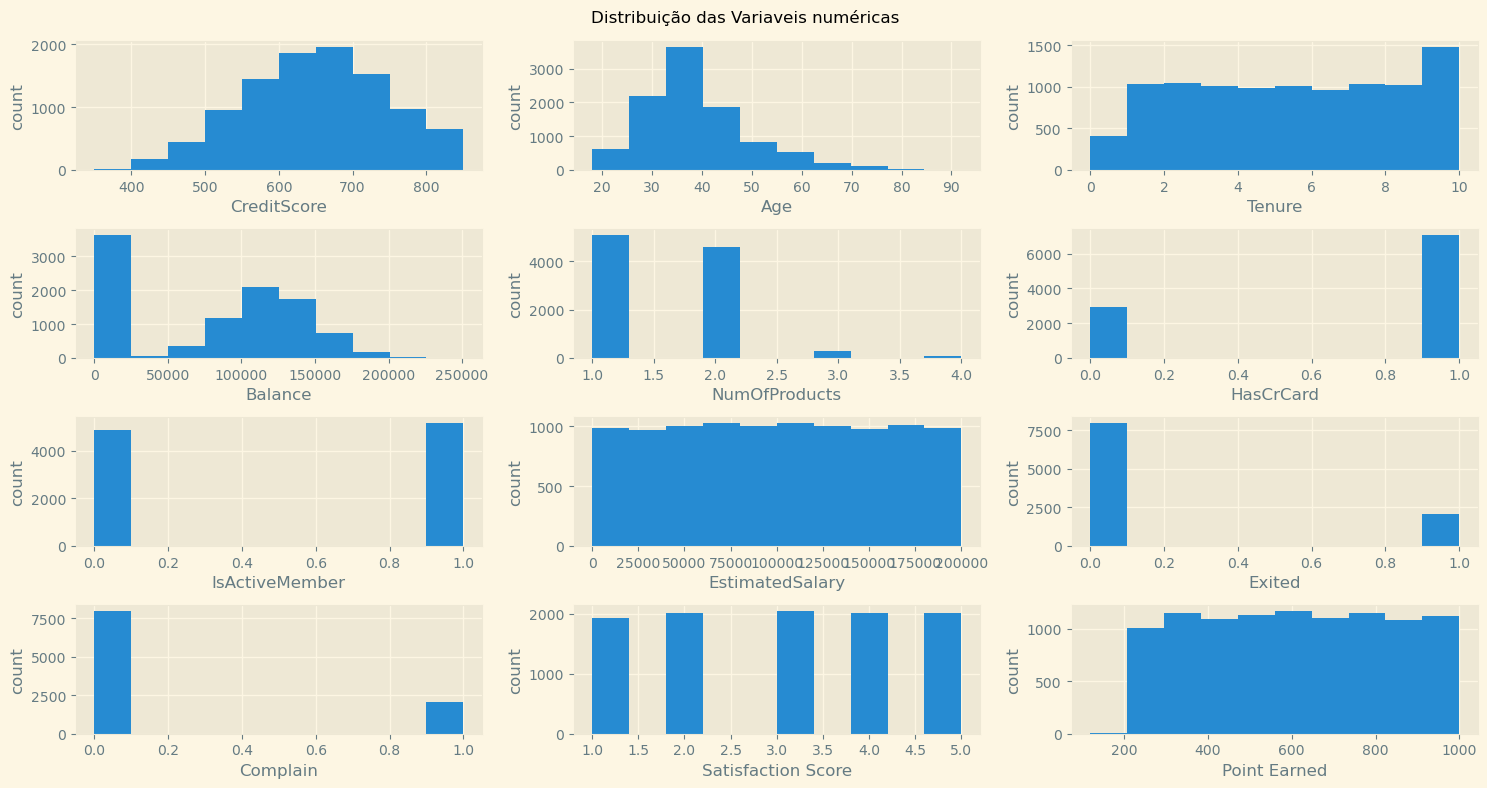

In [8]:
eda.analiseUnivariada(df, "number")

A partir das análises realizadas, foi possível identificar a presença de outliers na variável Age. No entanto, antes de optar por sua remoção, será necessário verificar se esses valores extremos possuem relação significativa com a variável alvo Exited. Caso essa associação se confirme, o tratamento será conduzido com cautela, a fim de preservar informações relevantes para o modelo. As demais variáveis não apresentaram outliers significativos.

Além disso, observou-se que as colunas Exited e Complain apresentam proporções semelhantes, o que pode indicar uma possível correlação entre elas. Esse aspecto será investigado com mais profundidade na análise bivariada. No geral, as demais variáveis, até o momento, não revelaram insights relevantes de forma isolada. Agora analisarei as variaveis categoricas

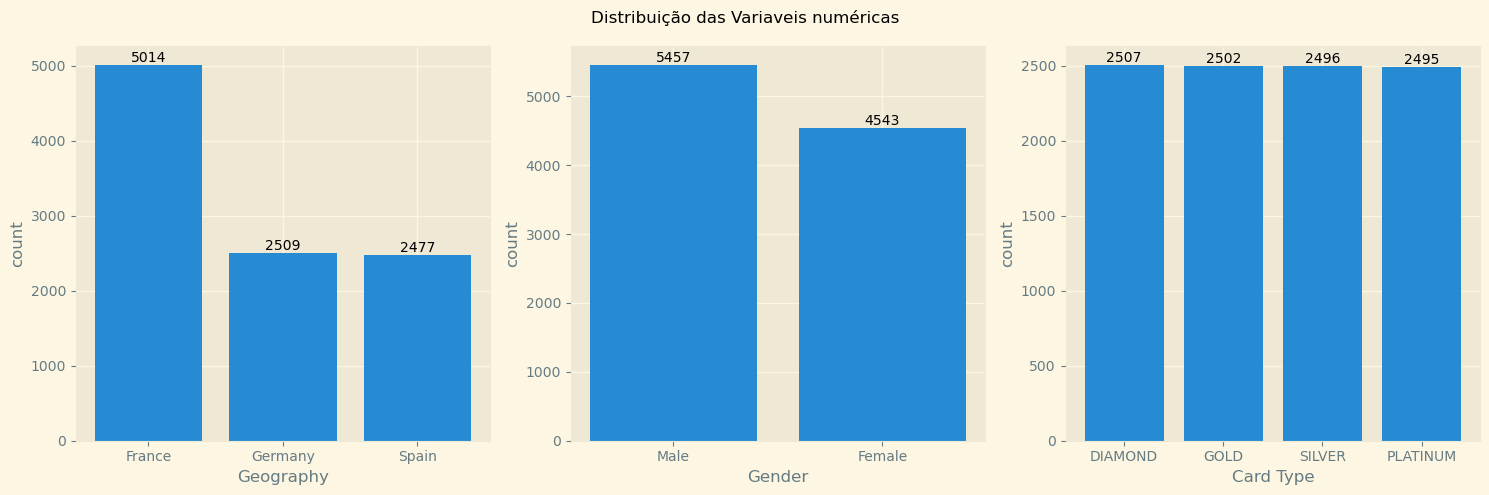

In [12]:
eda.analiseUnivariada(df, "object")

Após a análise das variáveis, observa-se que a maioria dos clientes é da França. Em relação ao gênero, há uma diferença moderada na distribuição entre homens e mulheres. Já a variável Car Type apresenta categorias com valores bem equilibrados, sem grandes discrepâncias.

---
### Conclusão da Análise Univariada
A análise univariada proporcionou uma visão inicial relevante sobre o comportamento das variáveis do conjunto de dados. Entre as variáveis numéricas, destacam-se outliers na variável Age, que requerem atenção especial, pois podem estar associados ao churn. Também foi possível observar que a maioria dos clientes possui cartão de crédito e mantém entre 1 a 2 produtos com o banco.

Em relação às variáveis categóricas, a maioria dos clientes é da França, há um leve desequilíbrio entre os gêneros, e os tipos de cartão estão distribuídos de forma relativamente uniforme. Além disso, a semelhança nas proporções das variáveis Exited e Complain pode indicar uma possível correlação, que será explorada na análise bivariada.

De modo geral, a análise univariada foi fundamental para compreender a estrutura dos dados, identificar padrões iniciais e orientar os próximos passos da análise exploratória. Agora irei partir para as análises bi variadas para agora identificar algum padrão entre as variavies e a target

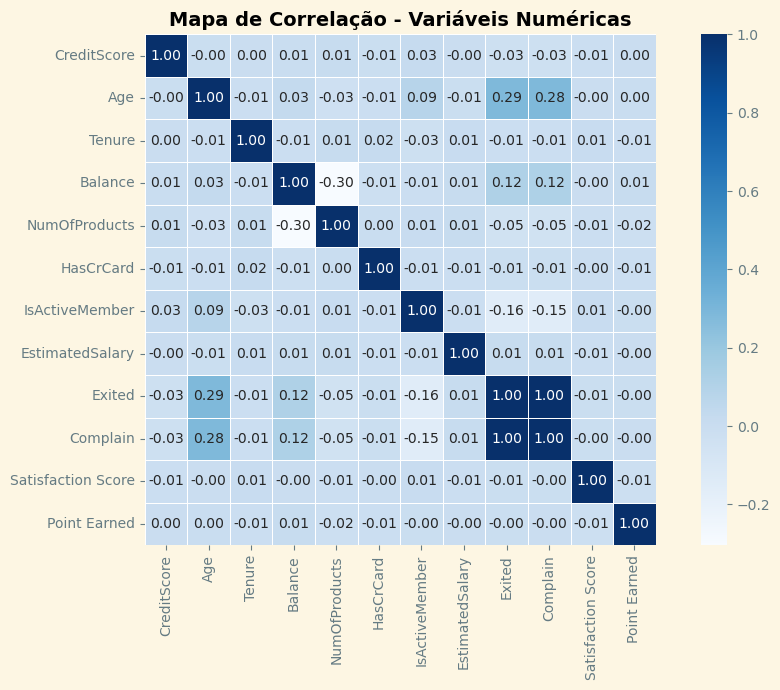

In [32]:
eda.analiseBivariada(df, "number")



#### **Insights da Análise de Correlação**

Após a análise do gráfico de correlação apresentado, percebe-se uma possível **correlação fortíssima entre as variáveis `Complain` e `Exited`**, praticamente **100%**, o que indica que **clientes que já reclamaram tendem a sair da empresa**.

Além disso, a variável `Complain` também apresenta uma correlação positiva com a idade (`0.29`), sugerindo que **clientes que reclamam tendem a ser mais velhos**. Portanto, aqueles outliers observados não são casos isolados, e sim **um padrão de comportamento — o que justifica a manutenção desses dados na base**.

Ainda analisando a variável `Complain`, nota-se uma correlação negativa com `IsActiveMember` (`-0.16`), o que sugere que **clientes menos ativos também tendem a reclamar mais**. Apesar de essa correlação ser fraca, ela **reforça um padrão comportamental** relevante.

Outro ponto observado é que **clientes com menos produtos também tendem a reclamar mais** (`-0.05`) — e, como a reclamação está fortemente associada à saída, **isso levanta a hipótese de que ter poucos produtos também pode estar associado à saída**.

⚠️ **Importante:** essas observações ainda são hipóteses. Como sabemos, **correlação não implica causalidade**. No entanto, **essas relações já apontam possíveis padrões** de comportamento que merecem ser analisados com mais profundidade.

---

Além disso, observamos que **clientes com saldo (balance) mais alto tendem a possuir menos produtos (`-0.30`)**. Juntando isso com a informação de que **clientes com saldo maior também tendem a sair**, podemos inferir que **clientes com poucos produtos e saldo elevado podem estar mais propensos à saída**.

---

#### Próximos passos:

Antes de seguir diretamente para os testes estatísticos (como testes de hipótese), irei realizar uma **análise bivariada com as variáveis categóricas**, para entender melhor como cada categoria se distribui em relação à variável de saída (`Exited`).


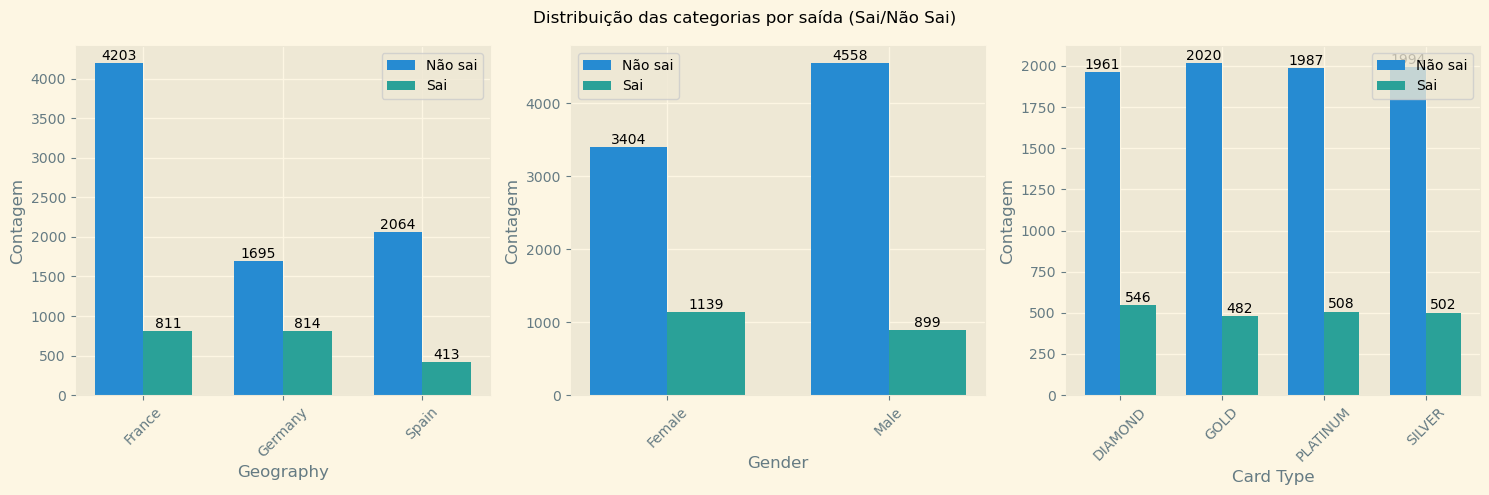

In [33]:
eda.analiseBivariada(df, "object")



#### **📊 Insights da Análise Bivariada das Variáveis Categóricas**

Após a análise dos gráficos bivariados, os seguintes padrões foram identificados:

* **Região do cliente:** Esta foi a única variável categórica que demonstrou um padrão relevante. Observa-se que, na **Alemanha**, aproximadamente **50% dos clientes saem da empresa**, o que pode indicar **problemas específicos relacionados à atuação nesse país**. Essa anomalia merece investigação mais profunda, pois pode estar ligada a fatores econômicos, culturais ou operacionais específicos da região.

* **Gênero:** Não foi identificado um padrão claro de saída entre homens e mulheres. A proporção de clientes que saem e os que permanecem é bastante semelhante entre os gêneros, indicando que **o gênero não parece influenciar diretamente a saída dos clientes**.

* **Tipo de cartão:** Também **não há diferenças significativas** entre os tipos de cartão (como Blue, Silver, Gold e Platinum) em relação à taxa de saída. A distribuição dos clientes que saem e permanecem é relativamente constante entre as categorias.

---

#### **🔎 Conclusão Parcial**

De modo geral, **a variável categórica que mais chama atenção é a localização geográfica do cliente**, especialmente a **Alemanha**, onde a taxa de saída é expressivamente maior. Já as variáveis **gênero** e **tipo de cartão** **não apresentaram indícios de correlação com a saída (`Exited`)**.

---

#### **🧪 Próximo Passo da Análise**

Diante da alta taxa de saída na Alemanha, o próximo passo será **analisar a média das variáveis numéricas por país**, com foco especial na Alemanha. O objetivo é verificar se variáveis como `Balance`, `IsActiveMember` e `NumOfProducts` apresentam **valores distintos ou comportamentos anormais nessa região**, o que poderia ajudar a explicar a alta taxa de evasão observada.



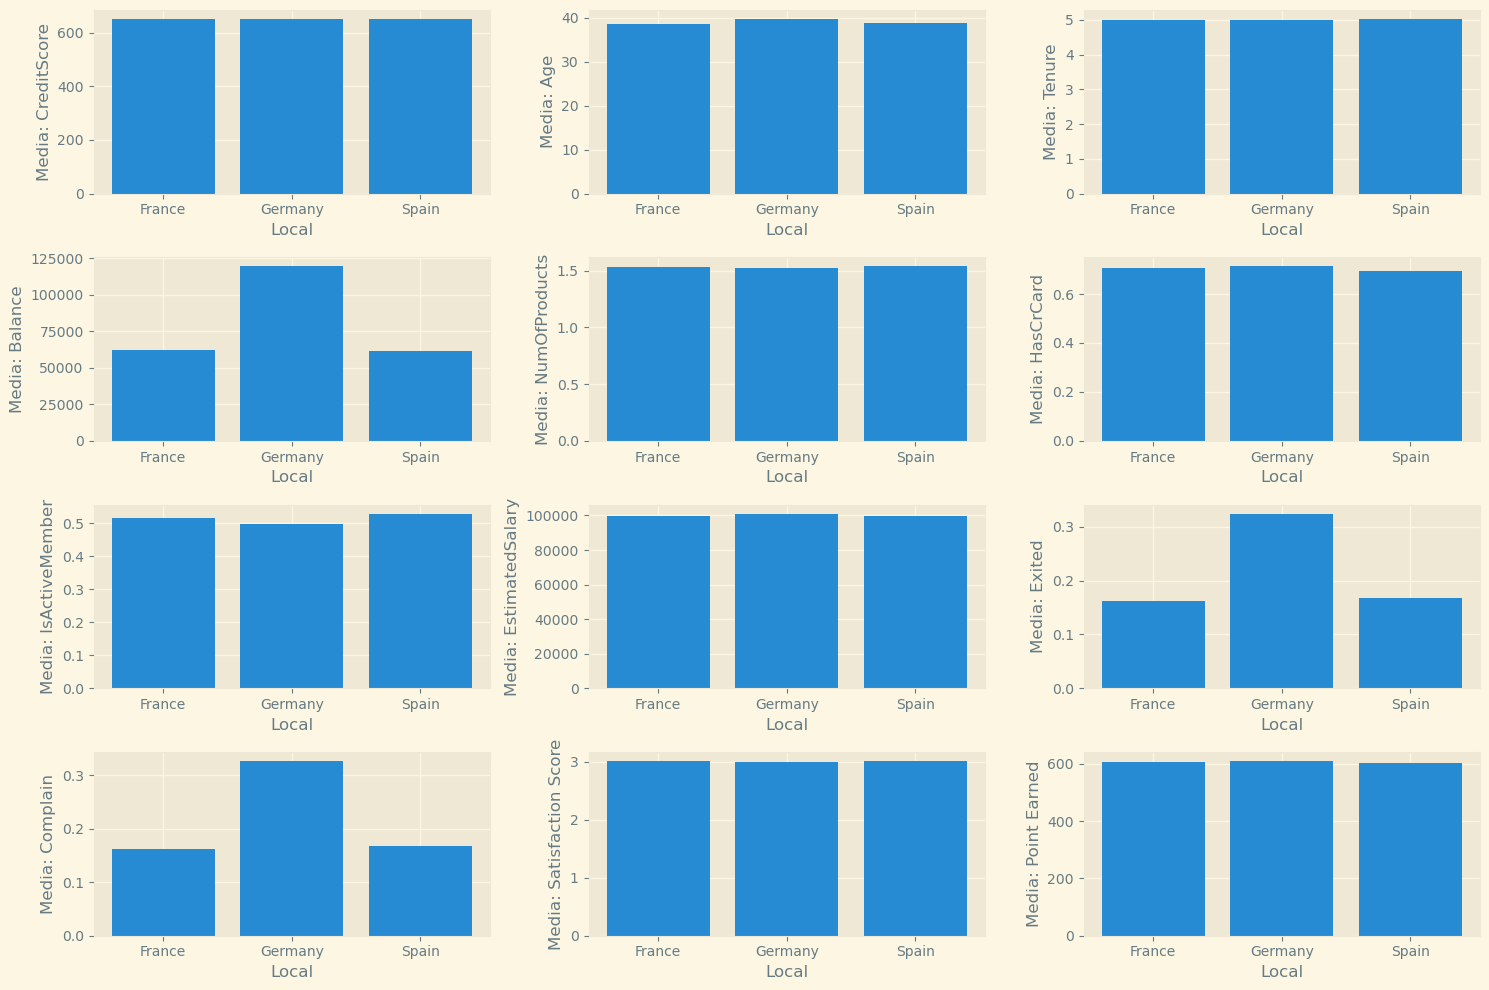

In [ ]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=3, nrows=4)
axs = axs.flatten()
for i, coluna in enumerate(df.select_dtypes(include="number").columns):
    f = df[["Geography", coluna]].groupby("Geography").mean().reset_index()
    f.columns = ["Local", "Media"]
    axs[i].bar(f["Local"], f["Media"])
    axs[i].set_xlabel("Local")
    axs[i].set_ylabel(f"Media: {coluna}")

plt.tight_layout()
plt.show()



#### ** Interpretação dos Fatores de Evasão na Alemanha**

Fica evidente que a **alta taxa de evasão dos clientes na Alemanha (cerca de 50%) está fortemente associada a três fatores principais**: maior frequência de reclamações, maior saldo (`Balance`) e menor número médio de produtos. Esses elementos, conforme já observado na análise das variáveis numéricas, são **características comuns entre os clientes que tendem a sair da empresa**.

No caso da **Alemanha**, esse padrão é ainda mais evidente: os clientes alemães são os que **mais reclamam** e também os que apresentam, em média, os **maiores saldos bancários**, reforçando a associação entre essas variáveis e a saída dos clientes.

Embora o número de produtos seja baixo também em outras regiões, apenas na Alemanha essa característica parece estar **mais diretamente relacionada à evasão**. Isso sugere que **a baixa adesão a produtos pode ser um fator mais sensível naquele país**, o que **abre espaço para estratégias voltadas à oferta de novos produtos** ou **engajamento mais eficaz dos clientes alemães**, como forma de reduzir a taxa de saída.

Boa observação, Rian! Vamos incluir a **idade** na conclusão, já que ela também apresentou correlação relevante com a evasão. Aqui está a **versão final da conclusão da análise bivariada**, agora completa:

---

####  **Conclusão da Análise Bivariada**

A análise bivariada — considerando tanto as variáveis numéricas quanto as categóricas — revelou **padrões significativos associados à evasão de clientes**.

Nas **variáveis numéricas**, os principais fatores associados à saída foram:

* **Clientes que reclamam** (`Complain`) apresentaram uma **correlação fortíssima com a evasão**, praticamente determinística;
* **Idade** demonstrou uma correlação positiva, indicando que **clientes mais velhos tendem a sair com maior frequência**;
* **Saldo bancário** (`Balance`) foi outro destaque, com clientes que saem apresentando, em média, **saldos mais elevados**;
* **Menor número de produtos** (`NumOfProducts`) também apareceu como um fator, ainda que com correlação fraca, mas com **padrão recorrente entre os que saem**;
* **Menor nível de atividade** (`IsActiveMember`) apresentou uma correlação negativa, sugerindo que **clientes menos ativos estão mais propensos à evasão**.

Já entre as **variáveis categóricas**, a **região do cliente** se destacou como o fator mais relevante. Em especial, a **Alemanha** apresentou uma taxa de evasão de aproximadamente **50%**, significativamente acima das demais regiões. Os clientes dessa região concentram exatamente os perfis identificados anteriormente: **mais velhos, com maiores saldos, menos produtos e maior número de reclamações** — o que reforça a ideia de que esses fatores, combinados, **potencializam a saída dos clientes alemães**.

Por outro lado, variáveis como **gênero** e **tipo de cartão** **não demonstraram diferenças significativas** entre os que saem e os que permanecem, e portanto **não parecem influenciar diretamente a evasão**.

---

#### Próximos Passos

Com base nessa análise, algumas **hipóteses fortes foram levantadas** sobre os fatores que podem influenciar a evasão de clientes. A próxima etapa será aplicar **testes estatísticos apropriados** (como testes de hipótese ou regressão) para validar essas relações, identificando quais variáveis têm **efeito estatisticamente significativo**. Isso permitirá **direcionar ações de retenção mais precisas**, especialmente para grupos de maior risco, como os **clientes da Alemanha com altos saldos e baixa interação com a empresa**.



In [57]:
dfSemOutliears.to_csv("../Dados/Base de dados Tratada.csv")

| **Insight**                                          | **Descrição**                                                                                     | **Recomendação**                                                                 |
|------------------------------------------------------|-------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **Pessoas mais velhas cancelam mais cartões**        | Clientes com idades mais avançadas tendem a cancelar mais cartões.                               | Ofereça benefícios personalizados para clientes mais velhos (ex.: suporte VIP). |
| **Número de produtos está inversamente relacionado ao churn** | Clientes com mais produtos contratados (empréstimos, seguros, etc.) tendem a cancelar menos.    | Promova a contratação de produtos adicionais para aumentar a retenção.          |
| **Membros ativos tendem a não cancelar**             | Clientes que são membros ativos possuem menor propensão a cancelar seus cartões.                 | Promova programas de engajamento para aumentar a atividade dos clientes.        |